# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")


# Display the data table for preview
combined_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Checking the number of mice.
mouse_metadata["Mouse ID"].count()

249

In [16]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate = combined_mouse_df.loc[combined_mouse_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

duplicate


array(['g989'], dtype=object)

In [17]:
duplicate_mouse_df = combined_mouse_df.loc[combined_mouse_df["Mouse ID"] == "g989"]
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [21]:
# cleaned data frame by dropping duplicates
cleaned_df = combined_mouse_df[combined_mouse_df["Mouse ID"].isin(duplicate_mouse_df) == False]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [25]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"].unique())

249

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

groupby_drug_mean = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
print(f"The mean of the tumor volume for each regimen is:\n{groupby_drug_mean}")


groupby_drug_median = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
print(f"The median of the tumor volume for each regimen is:\n{groupby_drug_mean}")


groupby_drug_variance = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
print(f"The variance of the tumor volume for each regimen is:\n{groupby_drug_variance}")


groupby_drug_standar_deviaton = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
print(f"The standard deviation of the tumor volume for each regimen is:\n{groupby_drug_standar_deviaton}")

groupby_drug_SEM = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
print(f"The SEM of the tumor volume for each regimen is:\n{groupby_drug_SEM}")


The mean of the tumor volume for each regimen is:
Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
The median of the tumor volume for each regimen is:
Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
The variance of the tumor volume for each regimen is:
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: 

In [28]:
# Assemble the resulting series into a single summary DataFrame.

summary_dataframe = pd.DataFrame({"Mean Tumor Volume": groupby_drug_mean,
                                   "Median Tumor Volume": groupby_drug_median,
                                    "Tumor Volume Variance" : groupby_drug_variance,
                                    "Tumor Volume Std. Dev." : groupby_drug_standar_deviaton,
                                    "Tumor Volume Std. Err." : groupby_drug_SEM,
                      
                                 })

summary_dataframe

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
single_line_summary_dataframe = cleaned_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}) 
                       
single_line_summary_dataframe

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

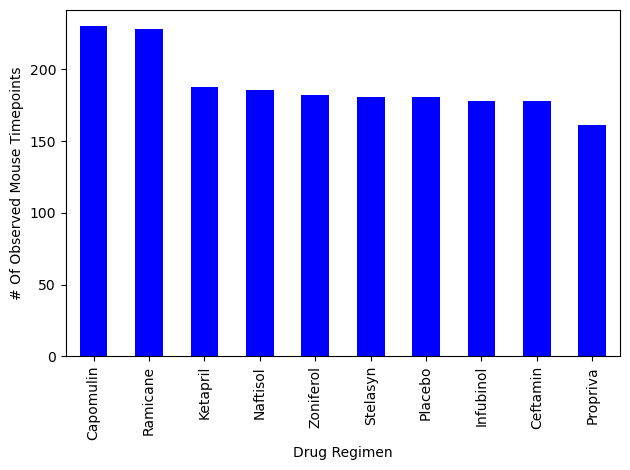

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

total_rows = cleaned_df["Drug Regimen"].value_counts()

# Create a bar plot using Pandas

ax1 = total_rows.plot(kind="bar", color="blue")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("# Of Observed Mouse Timepoints")
plt.tight_layout()  
plt.show()



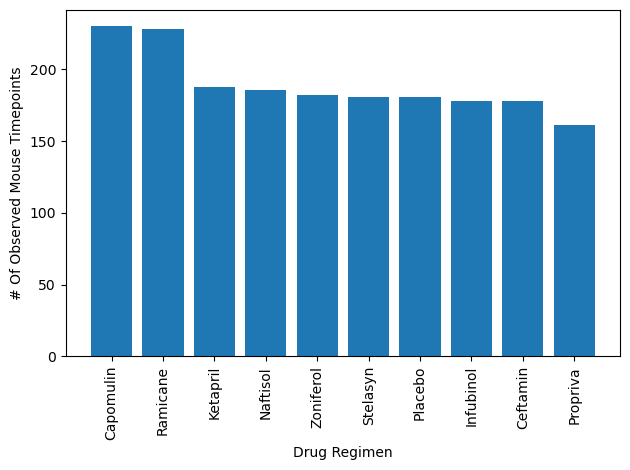

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

counted = cleaned_df["Drug Regimen"].value_counts()

plt.bar(counted.index.values, counted.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# Of Observed Mouse Timepoints")
plt.tight_layout()  
plt.show()





['Female' 'Male']
Sex
Male      958
Female    935
Name: count, dtype: int64


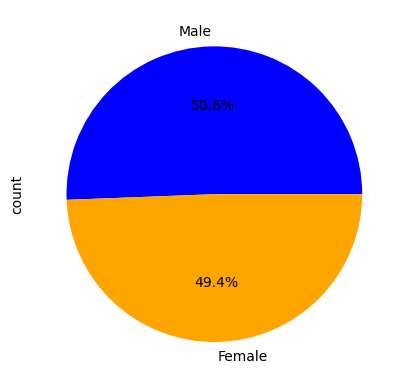

In [39]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_gender = combined_mouse_df["Sex"].unique()
print(mice_gender)
combined_mouse_df["Sex"].value_counts()
print(combined_mouse_df["Sex"].value_counts())

# Make the pie chart
labels = ["Male", "Female"]
sizes = [958, 935] 
colors = ["blue", "orange"]
plt.ylabel("count")
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint





## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
